In [4]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import math 

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df = pd.read_excel("Asssignment4_Data.xlsx","Train")
df.reset_index()

,index,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [7]:
house_df = df[df['Construction type']=='House']
h_prob=len(house_df)/20
print("HOUSE PROBABILITY",h_prob)
condo_df =df[df['Construction type']=='Condo']
c_prob=len(condo_df)/20
print("Condo PROBABILITY",c_prob)
apartment_df=df[df['Construction type']=='Apartment']
a_prob=len(apartment_df)/20
print("APARTMENT PROBABILITY",a_prob)

HOUSE PROBABILITY 0.35
Condo PROBABILITY 0.3
APARTMENT PROBABILITY 0.35


In [8]:
df1= pd.read_excel(r"Asssignment4_Data.xlsx", "Test")
df1

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [9]:
# Local Price
prob_Lp_a = [0.104, 0.106, 0.107, 0.097, 0.047]
prob_Lp_c = [0.083, 0.084, 0.085, 0.080, 0.52]
prob_Lp_h = [0.5, 0.000021, 0.0001, 0, 0]

#Land Area
prob_LA_a = [0.120, 0.07, 0.103, 0.114, 0.115]
prob_LA_c = [0.15, 0.07, 0.116, 0.137, 0.144]
prob_LA_h = [0.17, 0.09, 0.14, 0.16, 0.13]
#BATHROOMS
prob_B_a = [0.65, 0.65, 0.62, 0.65, 0.65]
prob_B_c = [0.63, 0.63, 0.57, 0.63, 0.63]
prob_B_h = [0.155, 0.155, 1.97, 0.155, 0.155]

#Living Area
prob_LiA_a = [0.55, 0.52, 0.56, 0.5, 0.51]
prob_LiA_c = [0.429, 0.419, 0.431, 0.413, 0.401]
prob_LiA_h = [0.88, 0.35, 1.63, 0.21, 1.25]

#Garages
prob_G_a = [0.552, 0.3, 0.3, 0.529, 0.3]
prob_G_c = [0.63, 0.33, 0.33, 0.73, 0.33]
prob_G_h = [0.47, 0.25, 0.25, 0.42, 0.25]

#Rooms 6 8 7 8 6
prob_R_a = [0.24, 0.20, 0.29, 0.20, 0.24]
prob_R_c = [0.21, 0.19, 0.24, 0.19, 0.21]
prob_R_h = [0.56, 0.015, 0.26, 0.015, 0.56]

#Bedroom
prob_Be_a = [0.37, 0.34, 0.37, 0.34, 0.37]
prob_Be_c = [0.45, 0.34, 0.45, 0.34, 0.45]
prob_Be_h = [0.69, 0.15, 0.69, 0.15, 0.69]

#Age of Home
prob_A_a = [0.025, 0.022, 0.001, 0.023, 0.022]
prob_A_c = [0.027, 0.023, 0.0009, 0.02, 0.022]
prob_A_h = [0.023, 0.17, 0.0015, 0.03, 0.029]

In [10]:
MAP_classify = []
for i in range(0, 5):
  probab_Apartment = prob_Lp_a[i] * prob_LA_a[i] * prob_B_a[i] * prob_LiA_a[i] * prob_G_a[i] * prob_R_a[i] * prob_Be_a[i] * prob_A_a[i] * a_prob
  probab_Condo = prob_Lp_c[i] * prob_LA_c[i] * prob_B_c[i] * prob_LiA_c[i] * prob_G_c[i] * prob_R_c[i] * prob_Be_c[i] * prob_A_c[i] * c_prob
  probab_House = prob_Lp_h[i] * prob_LA_h[i] * prob_B_h[i] * prob_LiA_h[i] * prob_G_h[i] * prob_R_h[i] * prob_Be_h[i] * prob_A_h[i] * h_prob
  lst = []
  lst.append(probab_Apartment)
  lst.append(probab_Condo)
  lst.append(probab_House)
  MAP_classify.append(lst)

misclassify = 0
for i in range(0, 5):
  probab = MAP_classify[i]
  clss = ""
  if np.argmax(MAP_classify[i]) == 0:
    clss = "APARTMENT"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 1:
    clss = "CONDO"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if np.argmax(MAP_classify[i]) == 2:
    clss = "HOUSE"
    print(clss, MAP_classify[i], probab[np.argmax(MAP_classify[i])])
  if clss.lower() != (df1["Construction type"].tolist()[i]).lower():
    misclassify += 1 
print("Misclassified: ", misclassify, "Correct: ", 5-misclassify) 

HOUSE [1.9135980864e-06, 1.6226489381602497e-06, 1.6949783373599997e-05] 1.6949783373599997e-05
APARTMENT [3.939503568e-07, 2.2831132112712004e-07, 3.431634609374999e-12] 3.939503568e-07
APARTMENT [4.311116310479999e-08, 2.3309368101359998e-08, 1.05853108725e-09] 4.311116310479999e-08
APARTMENT [1.04068767621e-06, 8.068778317152001e-07, 0.0] 1.04068767621e-06
CONDO [3.675396324599999e-07, 3.8935023551424e-06, 0.0] 3.8935023551424e-06
Misclassified:  4 Correct:  1


2.Decision Tree

In [11]:
df_train= pd.read_excel(r"Asssignment4_Data.xlsx", "Train")

In [12]:
df_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [13]:
y_train=df_train['Construction type']

In [14]:
x_train=df_train.drop(["Construction type","House ID"],axis=1)

In [15]:
x_train

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,4.9176,1.0,3.4720,0.998,1.0,7,4,42
1,5.0208,1.0,3.5310,1.500,2.0,7,4,62
2,4.5429,1.0,2.2750,1.175,1.0,6,3,40
3,4.5573,1.0,4.0500,1.232,1.0,6,3,54
4,5.0597,1.0,4.4550,1.121,1.0,6,3,42
5,3.8910,1.0,4.4550,0.988,1.0,6,3,56
6,5.8980,1.0,5.8500,1.240,1.0,7,3,51
7,5.6039,1.0,9.5200,1.501,0.0,6,3,32
8,16.4202,2.5,9.8000,3.420,2.0,10,5,42
9,14.4598,2.5,12.8000,3.000,2.0,9,5,14


In [16]:
y_train

0     Apartment
1         House
2         Condo
3     Apartment
4     Apartment
5         Condo
6         Condo
7         House
8         Condo
9     Apartment
10        House
11        House
12        House
13        Condo
14    Apartment
15        House
16    Apartment
17        House
18        Condo
19    Apartment
Name: Construction type, dtype: object

In [17]:
dc= DecisionTreeClassifier()
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
train_accuracy = dc.score(x_train, y_train)

In [19]:
print(str(train_accuracy*100)+"%")

100.0%


In [20]:
df_test=pd.read_excel(r"Asssignment4_Data.xlsx", "Test")

In [21]:
y_test=df_test['Construction type']

In [22]:
x_test=df_test.drop(["Construction type","House ID"],axis=1)

In [23]:
test_accuracy = dc.score(x_test, y_test)

In [24]:
print(str(test_accuracy*100)+"%")

40.0%


## 2.2

In [25]:
l1=[]
l2=[]
for i in range(1,31):
    dc= DecisionTreeClassifier(max_depth=i)
    dc.fit(x_train, y_train)
    train_accuracy = dc.score(x_train, y_train)
    l1.append(train_accuracy)
    print("Train accuracy for max depth= "+str(i)+" is  "+str(train_accuracy*100)+"%")
    test_accuracy = dc.score(x_test, y_test)
    l2.append(test_accuracy)
    print("Test accuracy for max depth= "+str(i)+" is  "+str(test_accuracy*100)+"%")

Train accuracy for max depth= 1 is  55.00000000000001%
Test accuracy for max depth= 1 is  40.0%
Train accuracy for max depth= 2 is  75.0%
Test accuracy for max depth= 2 is  60.0%
Train accuracy for max depth= 3 is  90.0%
Test accuracy for max depth= 3 is  40.0%
Train accuracy for max depth= 4 is  95.0%
Test accuracy for max depth= 4 is  40.0%
Train accuracy for max depth= 5 is  100.0%
Test accuracy for max depth= 5 is  40.0%
Train accuracy for max depth= 6 is  100.0%
Test accuracy for max depth= 6 is  40.0%
Train accuracy for max depth= 7 is  100.0%
Test accuracy for max depth= 7 is  40.0%
Train accuracy for max depth= 8 is  100.0%
Test accuracy for max depth= 8 is  40.0%
Train accuracy for max depth= 9 is  100.0%
Test accuracy for max depth= 9 is  40.0%
Train accuracy for max depth= 10 is  100.0%
Test accuracy for max depth= 10 is  40.0%
Train accuracy for max depth= 11 is  100.0%
Test accuracy for max depth= 11 is  40.0%
Train accuracy for max depth= 12 is  100.0%
Test accuracy for m

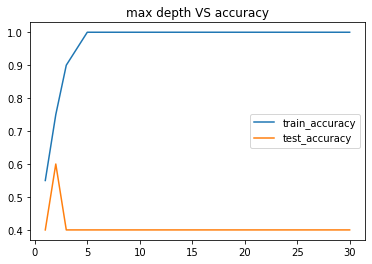

In [26]:
plt.plot([i for i in range(1,31)],l1,label='train_accuracy')
plt.plot([i for i in range(1,31)],l2,label='test_accuracy')
plt.title("max depth VS accuracy")
plt.legend()

we can see that for lower values of max_depth  the training accuracy is low as the depth of the tree increases the training accuracy went stable to 100%, After that even though there is increase in depth there is no change in training accuracy         

while coming to testing accuracy at initial state is some what low and later it reached a peak around 80%  and as the depth value is increasing it went to stable 40% state.           
we have to choose the depth value in such a range that it produce good accuracy on both the training and testing data we have to find trade-off value that is around 0-5


### 2.3

Depth  of a tree indicates length of maximum path from the root to leaf node.If we increase the depth of the tree, the tree branches splits further more to classify the data. As the depth of the tree increases further it will lead to overfitting for the data and leads to misclassification.

### 2.4

[Text(0.5, 0.8333333333333334, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 5.5\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.531\nsamples = 8\nvalue = [5, 2, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]')]

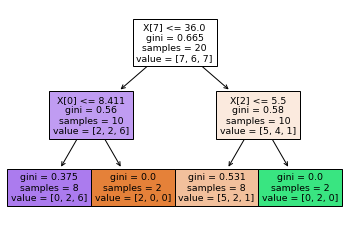

In [27]:
from sklearn import tree
dc= DecisionTreeClassifier(max_depth=2)
dc.fit(x_train, y_train)
tree.plot_tree(dc,filled=True)

In [28]:
import numpy as np
a=[[9.0384,1,7.8,1.5,1.5,7,3,23]]

In [29]:
dc.predict(a)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Apartment'], dtype=object)

### 3.

In [30]:
from operator import itemgetter
import random

In [31]:
df_train= pd.read_excel(r"Asssignment4_Data.xlsx", "Train")

In [32]:
df_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [33]:
df_test= pd.read_excel(r"Asssignment4_Data.xlsx", "Test")

In [34]:
df_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [35]:
x_train = df_train.drop('Construction type',axis=1)
x_tra_l = x_train.values.tolist()
y_train = df_train['Construction type'].tolist()
x_test = df_test.drop('Construction type',axis=1)
x_tst_l = x_test.values.tolist()
y_test = df_test['Construction type'].tolist()

In [36]:
def cal_euc_dist_N_neig(p1, train_l, n_neigh):
    dis_l = []
    row_n = 0
    for j in train_l:
        d = 0
        for i in range(0, 8):
            d = d + (p1[i] - j[i])**2
        dis_l.append([row_n, math.sqrt(d), y_train[row_n]])
        row_n += 1
    dis_l = sorted(dis_l, key=itemgetter(1), reverse=False)
    return dis_l[0:n_neigh]

In [37]:
def get_cls(mst_near):
    apt, condo, house = 0, 0, 0
    for i in range(len(mst_near)):
        if mst_near[i][2].lower() == "Apartment".lower():
            apt += 1
        if mst_near[i][2].lower() == "Condo".lower():
            condo += 1
        if mst_near[i][2].lower() == "House".lower():
            house += 1
    if apt > condo and apt > house:
        return "APARTMENT"  
    elif house > condo and house > apt:
        return "HOUSE"
    elif condo > apt and condo > house:
        return "CONDO"
    elif condo == apt and apt == house:
        return random.choice(["APARTMENT", "HOUSE", "CONDO"])
    elif condo == apt:
        return random.choice(["APARTMENT", "CONDO"])
    elif apt == house:
        return random.choice(["APARTMENT", "HOUSE"])
    elif condo == house:
        return random.choice(["HOUSE", "CONDO"])
  

In [38]:
def pred_cls(test_p, tran_set, n_neigh):
    mst_near= cal_euc_dist_N_neig(test_p, tran_set, n_neigh)
    class_pred = get_cls(mst_near)
    return class_pred

In [39]:
def evaluate(x_tra_l, x_tst_l, y_train, y_test, neigh):
    acc = 0
    corr_clasi = 0
    misclasi = 0
    for i in range(len(x_tst_l)):
        pred = pred_cls(x_tst_l[i], x_tra_l, neigh)
        if pred.lower() == y_test[i].lower():
            corr_clasi += 1
        elif pred.lower() != y_test[i].lower():
            misclasi += 1
        acc=corr_clasi/len(x_tst_l)
    return acc

In [40]:
acc_lst= []
k_lst = []
for i in range(1, 15):
    acc = evaluate(x_tra_l, x_tst_l, y_train, y_test, i)
    acc_lst.append(acc)
    k_lst.append(i)

In [41]:
print(k_lst)
print(acc_lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.6, 0.4, 0.2, 0.6, 0.4, 0.8, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


Text(0.5, 1.0, 'Accuracy vs K values')

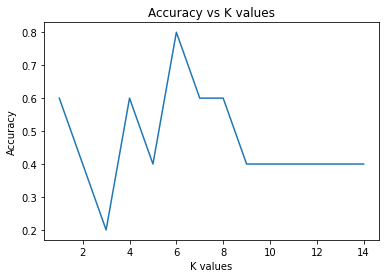

In [42]:
plt.plot(k_lst, acc_lst)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K values")